In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
import pandas as pd
file_path = "/content/drive/MyDrive/Phishing/malicious_phish.csv"
data = pd.read_csv(file_path,nrows=35000)
print(data.head())

                                                 url        type
0                                   br-icloud.com.br    phishing
1                mp3raid.com/music/krizz_kaliko.html      benign
2                    bopsecrets.org/rexroth/cr/1.htm      benign
3  http://www.garage-pirenne.be/index.php?option=...  defacement
4  http://adventure-nicaragua.net/index.php?optio...  defacement


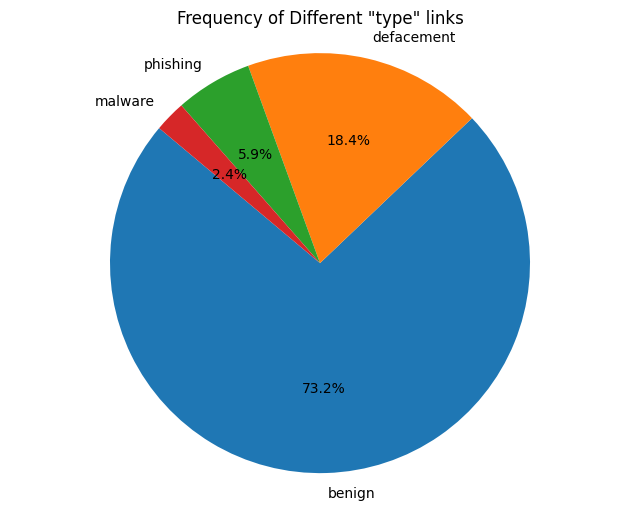

In [16]:
import matplotlib.pyplot as plt
class_freq = data['type'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(class_freq, labels=class_freq.index, autopct='%1.1f%%', startangle=140)
plt.title('Frequency of Different "type" links')
plt.axis('equal')
plt.show()

In [17]:
data.count()

url     35000
type    35000
dtype: int64

In [50]:
import joblib
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier

X = data['url']
y = data['type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

count_vectorizer = CountVectorizer()
count_vectorizer.fit(X_train)

pipeline_lr = make_pipeline(count_vectorizer, LogisticRegression(solver='sag'))
pipeline_svm = make_pipeline(count_vectorizer, SVC())
pipeline_dt = make_pipeline(count_vectorizer, DecisionTreeClassifier())

model = VotingClassifier(estimators=[('lr', pipeline_lr), ('svm', pipeline_svm), ('dt', pipeline_dt)], voting='hard')
model.fit(X_train, y_train)

joblib.dump(model, 'voting_classifier.joblib')


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


['voting_classifier.joblib']

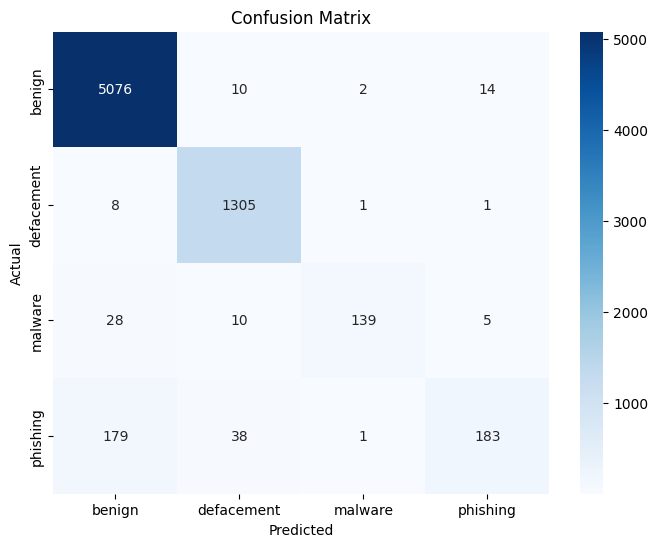

In [51]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [52]:
from sklearn.metrics import accuracy_score
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.9575714285714285


In [53]:
import joblib

model = joblib.load('voting_classifier.joblib')
new_data = ['https://example1.com', 'https://example2.com']
predictions = model.predict(new_data)
print("Predictions:", predictions)


Predictions: ['benign' 'benign']


In [54]:
import joblib

model = joblib.load('voting_classifier.joblib')

while True:
  user_link = input("Enter a URL (type 'q' to quit): ")
  if user_link == 'q':
    break
  new_data = [user_link]
  prediction = model.predict(new_data)[0]
  print("Prediction:", prediction)


Enter a URL (type 'q' to quit): https://colab.research.google.com/drive/1PjY6YfU_ZAzpZxP2QCoIUTZBuc29HWaU#scrollTo=IFH6DlEbH2Hc
Prediction: benign
Enter a URL (type 'q' to quit): br-icloud.com.br 
Prediction: phishing
Enter a URL (type 'q' to quit): http://www.garage-pirenne.be/index.php?option=
Prediction: defacement
Enter a URL (type 'q' to quit): q
